In [79]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color, transform, filters, feature, draw, registration

plt.set_cmap('gray') # set default colormap to 'gray'

<Figure size 640x480 with 0 Axes>

### Hough transform

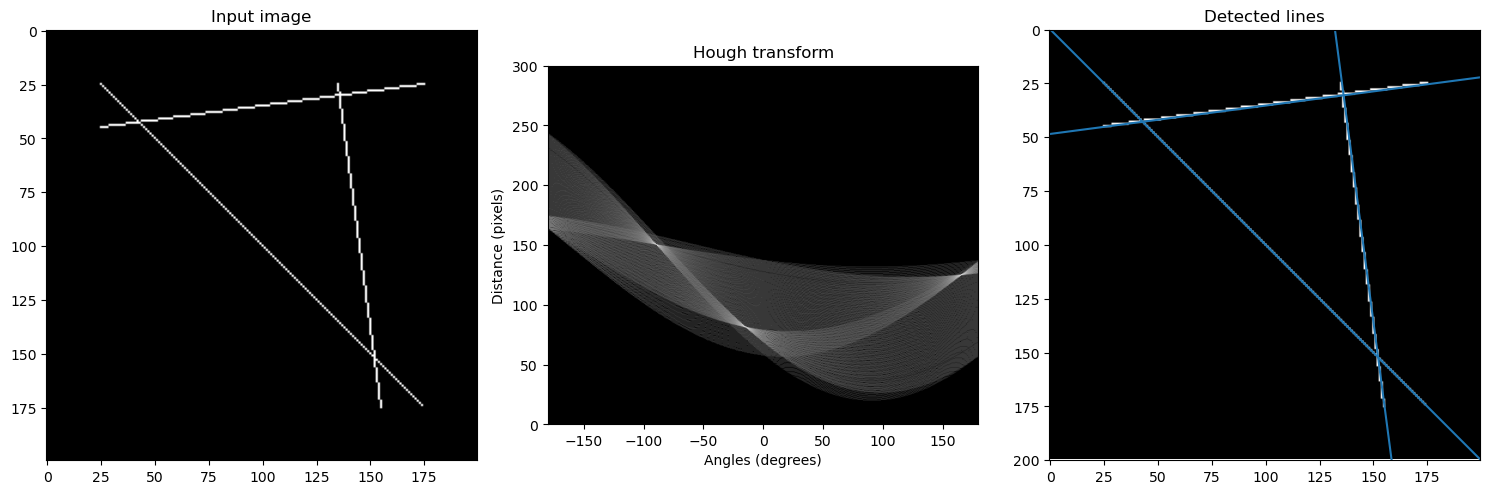

In [80]:
# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[draw.line(45, 25, 25, 175)] = 255
image[draw.line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = transform.hough_line(image, theta=tested_angles)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Input image')

bounds = [-180,180, 0,300]
ax[1].imshow(np.log(1 + h), extent=bounds)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

[((450, 239), (506, 229)), ((400, 141), (400, 85)), ((358, 377), (337, 373)), ((401, 371), (401, 326)), ((400, 325), (400, 145)), ((462, 496), (440, 495)), ((295, 600), (297, 569)), ((259, 608), (242, 553)), ((33, 502), (33, 431)), ((227, 573), (243, 524)), ((439, 247), (510, 234)), ((491, 315), (491, 292)), ((25, 350), (26, 327)), ((503, 419), (434, 419)), ((113, 474), (113, 452)), ((267, 278), (290, 274)), ((451, 400), (425, 400)), ((414, 282), (414, 249)), ((25, 489), (25, 367)), ((400, 80), (398, 59)), ((460, 320), (459, 297)), ((61, 320), (39, 319)), ((473, 409), (452, 409)), ((420, 320), (420, 279)), ((417, 139), (417, 116)), ((442, 236), (478, 218)), ((420, 278), (420, 253)), ((398, 58), (395, 34)), ((367, 72), (383, 45)), ((386, 135), (386, 107)), ((34, 430), (34, 325)), ((242, 552), (250, 516)), ((278, 631), (261, 610)), ((480, 409), (502, 409)), ((470, 401), (491, 400)), ((434, 219), (434, 179)), ((234, 282), (298, 258)), ((428, 448), (400, 448)), ((116, 613), (127, 592)), ((

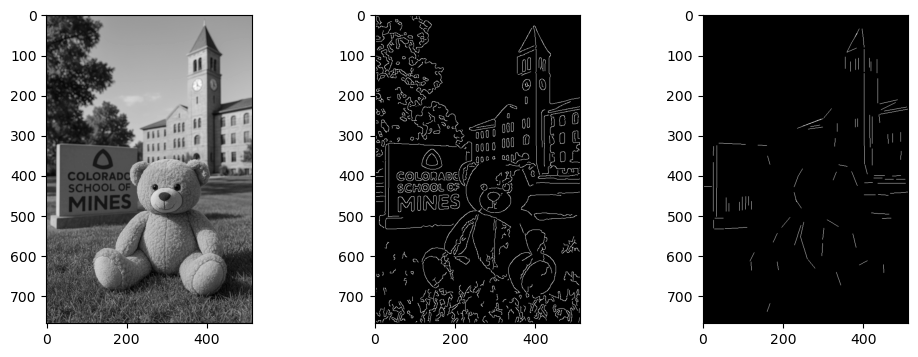

In [81]:
img = util.img_as_float32( color.rgb2gray( io.imread('data/Mines_Teddy_Bear.png') ) )
img = transform.rescale(img, 1/2)
# plt.imshow(img)

edges = feature.canny(img, sigma=2, low_threshold=0.1, high_threshold=0.2)
lines = transform.probabilistic_hough_line(edges,threshold=2, line_length=20, line_gap=2)
print(lines)

# line image
img_lines = np.zeros_like(img)
for line in lines:
    p0, p1 = line
    rr, cc = draw.line(p0[1], p0[0], p1[1], p1[0])
    img_lines[rr,cc] = 1
    

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4) )
ax[0].imshow(img)
ax[1].imshow(edges)
ax[2].imshow(img_lines)